# FAKE JOB LISTING PREDICTION


In [22]:
# import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from collections import defaultdict
#Natural Language Toolkit(nltk)
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download("stopwords")
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk import pos_tag


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics


from wordcloud import WordCloud,STOPWORDS


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

#import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\datta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\datta\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\datta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
df=pd.read_csv('00fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### EXPLORING DATASET


In [24]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [26]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df.shape

(17880, 18)

### DATA PREPROCESSING

In [28]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [29]:
df.fillna(' ',inplace = True)

In [30]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

### DATA VISUALIZATION

In [31]:
#Differentiate categorical data and numerical data
df_num = df[['telecommuting','has_company_logo','has_questions','fraudulent','salary_range']]
df_cat = df[['title', 'location','company_profile', 'requirements','employment_type',
'required_experience', 'required_education', 'industry', 'function']]

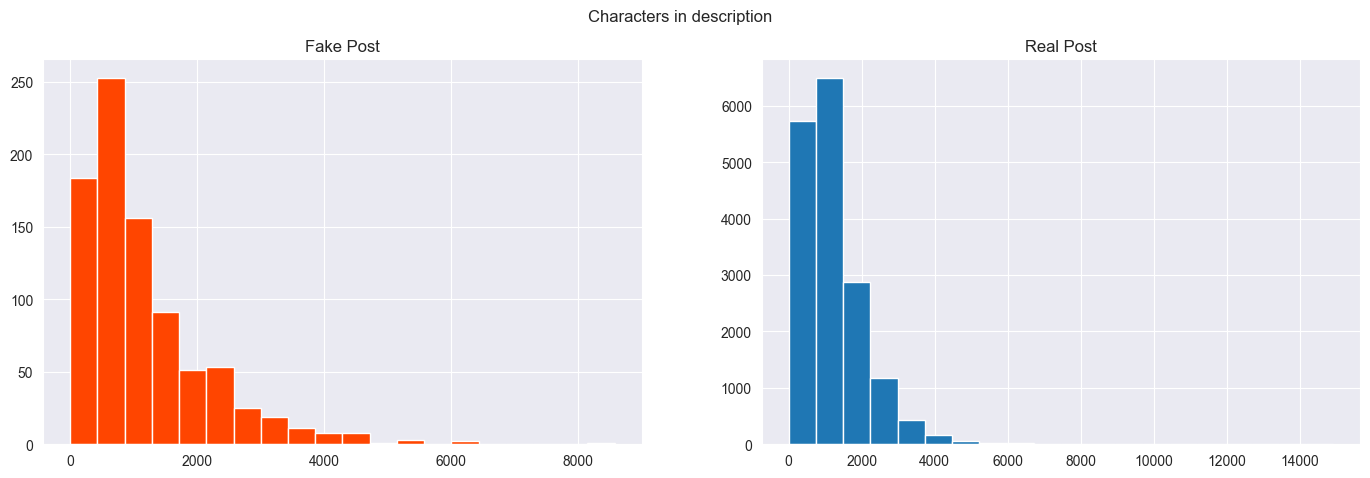

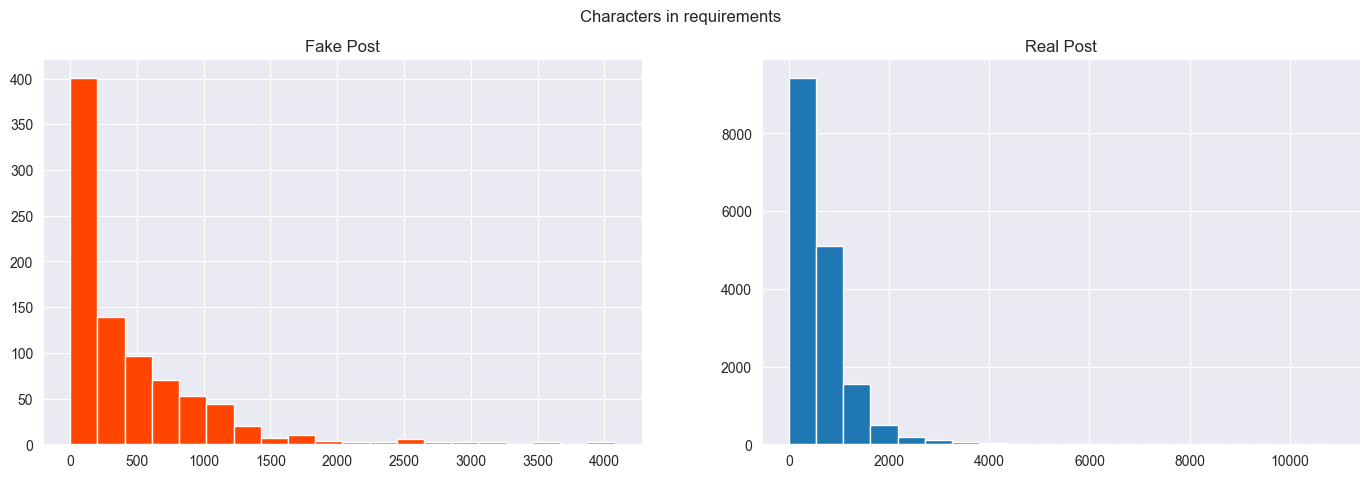

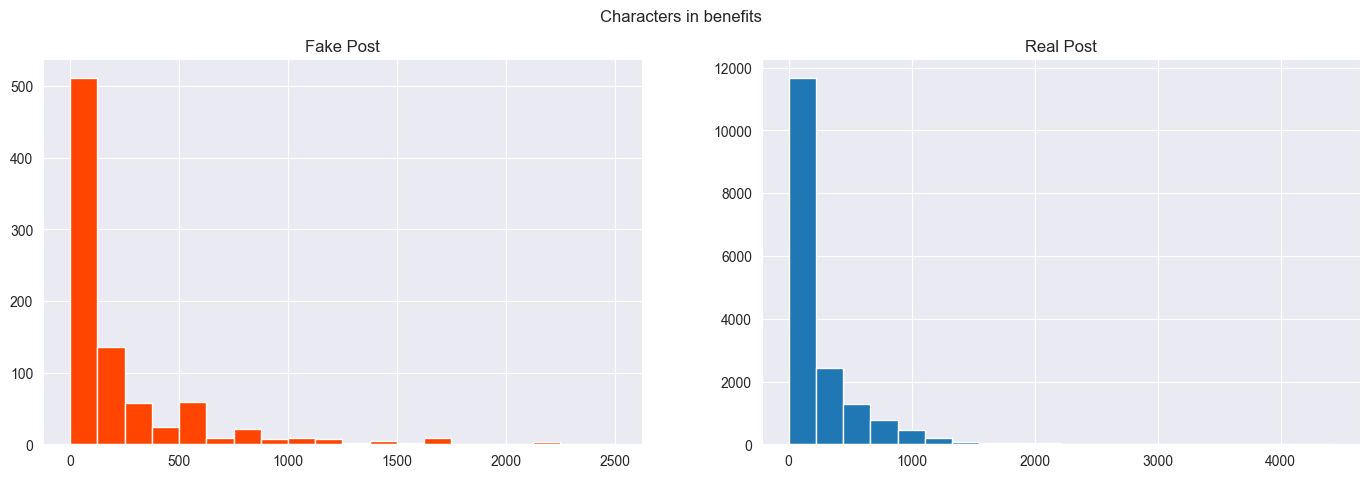

In [32]:
"""Extracting Text Featurs"""

#Number of characters
text_df = df[["title", "company_profile", "description", "requirements", "benefits","fraudulent"]]
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=df[text_df["fraudulent"]==1]['description'].str.len()
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fake Post')
length=text_df[text_df["fraudulent"]==0]['description'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in description')
plt.show()

fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=text_df[text_df["fraudulent"]==1]['requirements'].str.len()
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fake Post')
length=text_df[text_df["fraudulent"]==0]['requirements'].str.len()
ax2.hist(length,bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in requirements')
plt.show()

fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=text_df[text_df["fraudulent"]==1]['benefits'].str.len()
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fake Post')
length=text_df[text_df["fraudulent"]==0]['benefits'].str.len()
ax2.hist(length,bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in benefits')
plt.show()



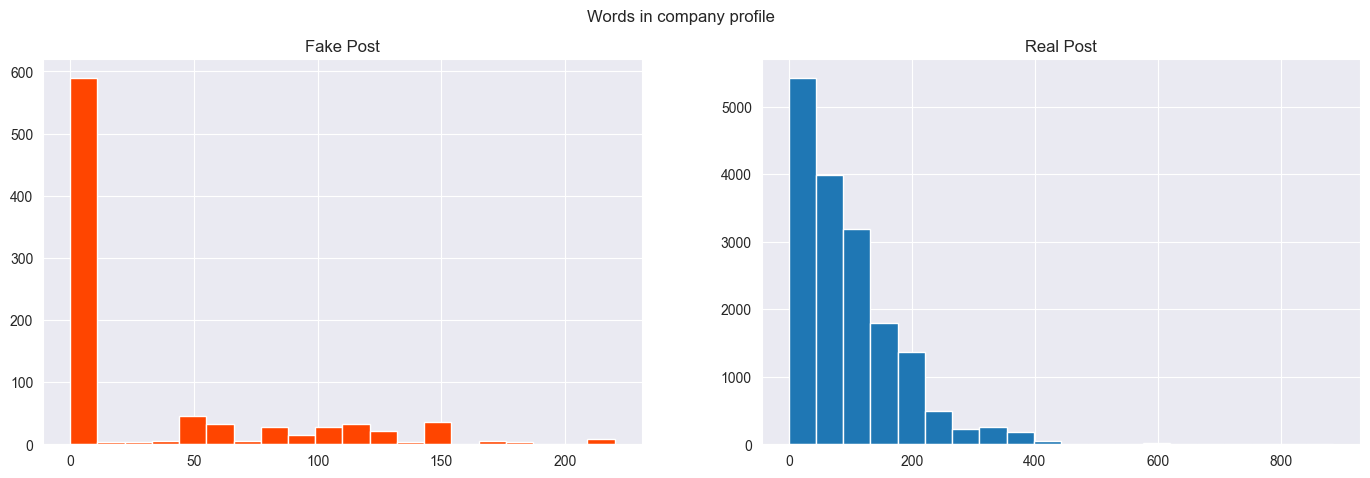

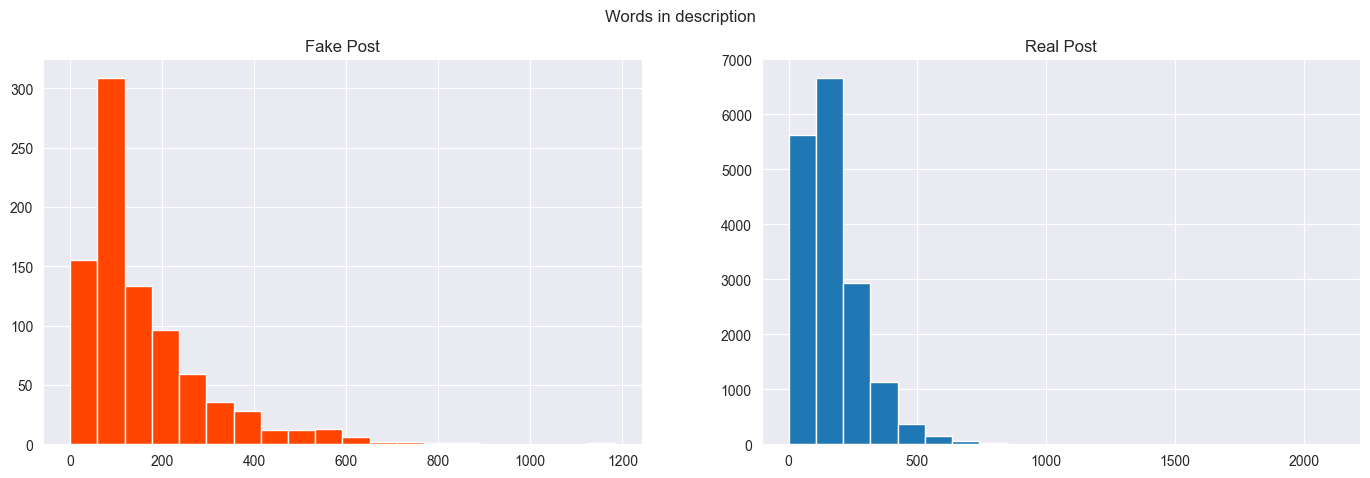

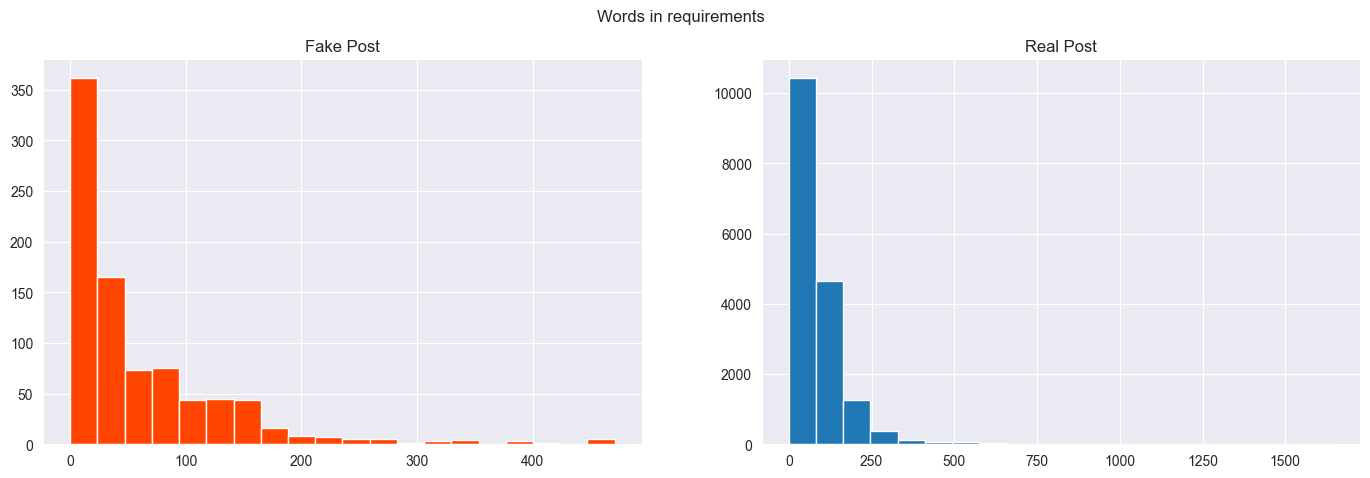

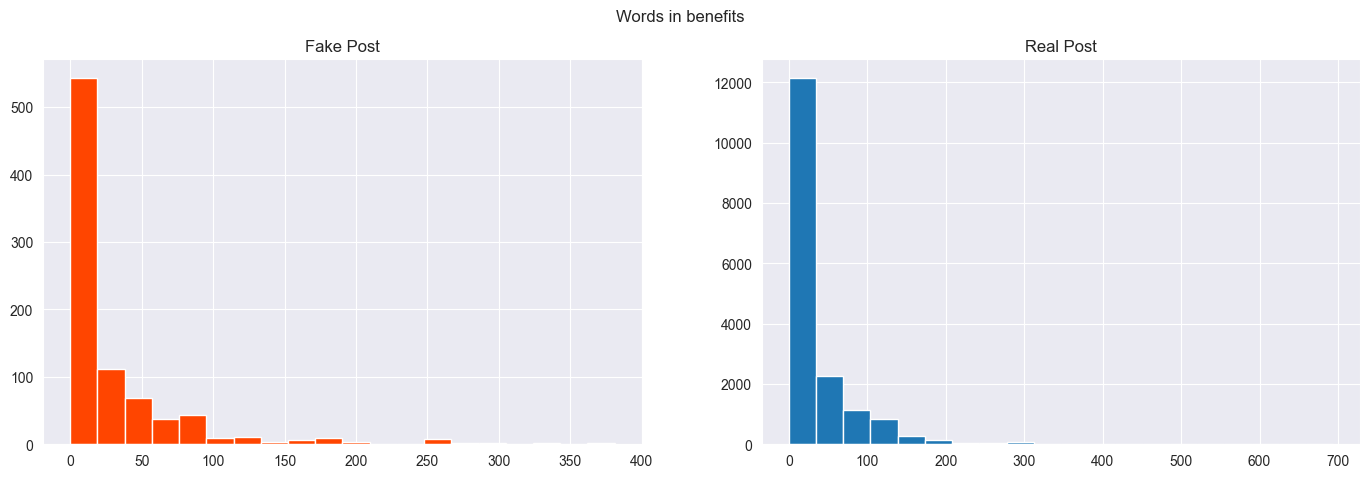

In [33]:
#Number of words
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]==1]['company_profile'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]==0]['company_profile'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in company profile')
plt.show()

fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]==1]['description'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]==0]['description'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in description')
plt.show()

fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]==1]['requirements'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]==0]['requirements'].str.split().map(lambda x: len(x))
ax2.hist(num,bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in requirements')
plt.show()

fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]==1]['benefits'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]==0]['benefits'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in benefits')
plt.show()



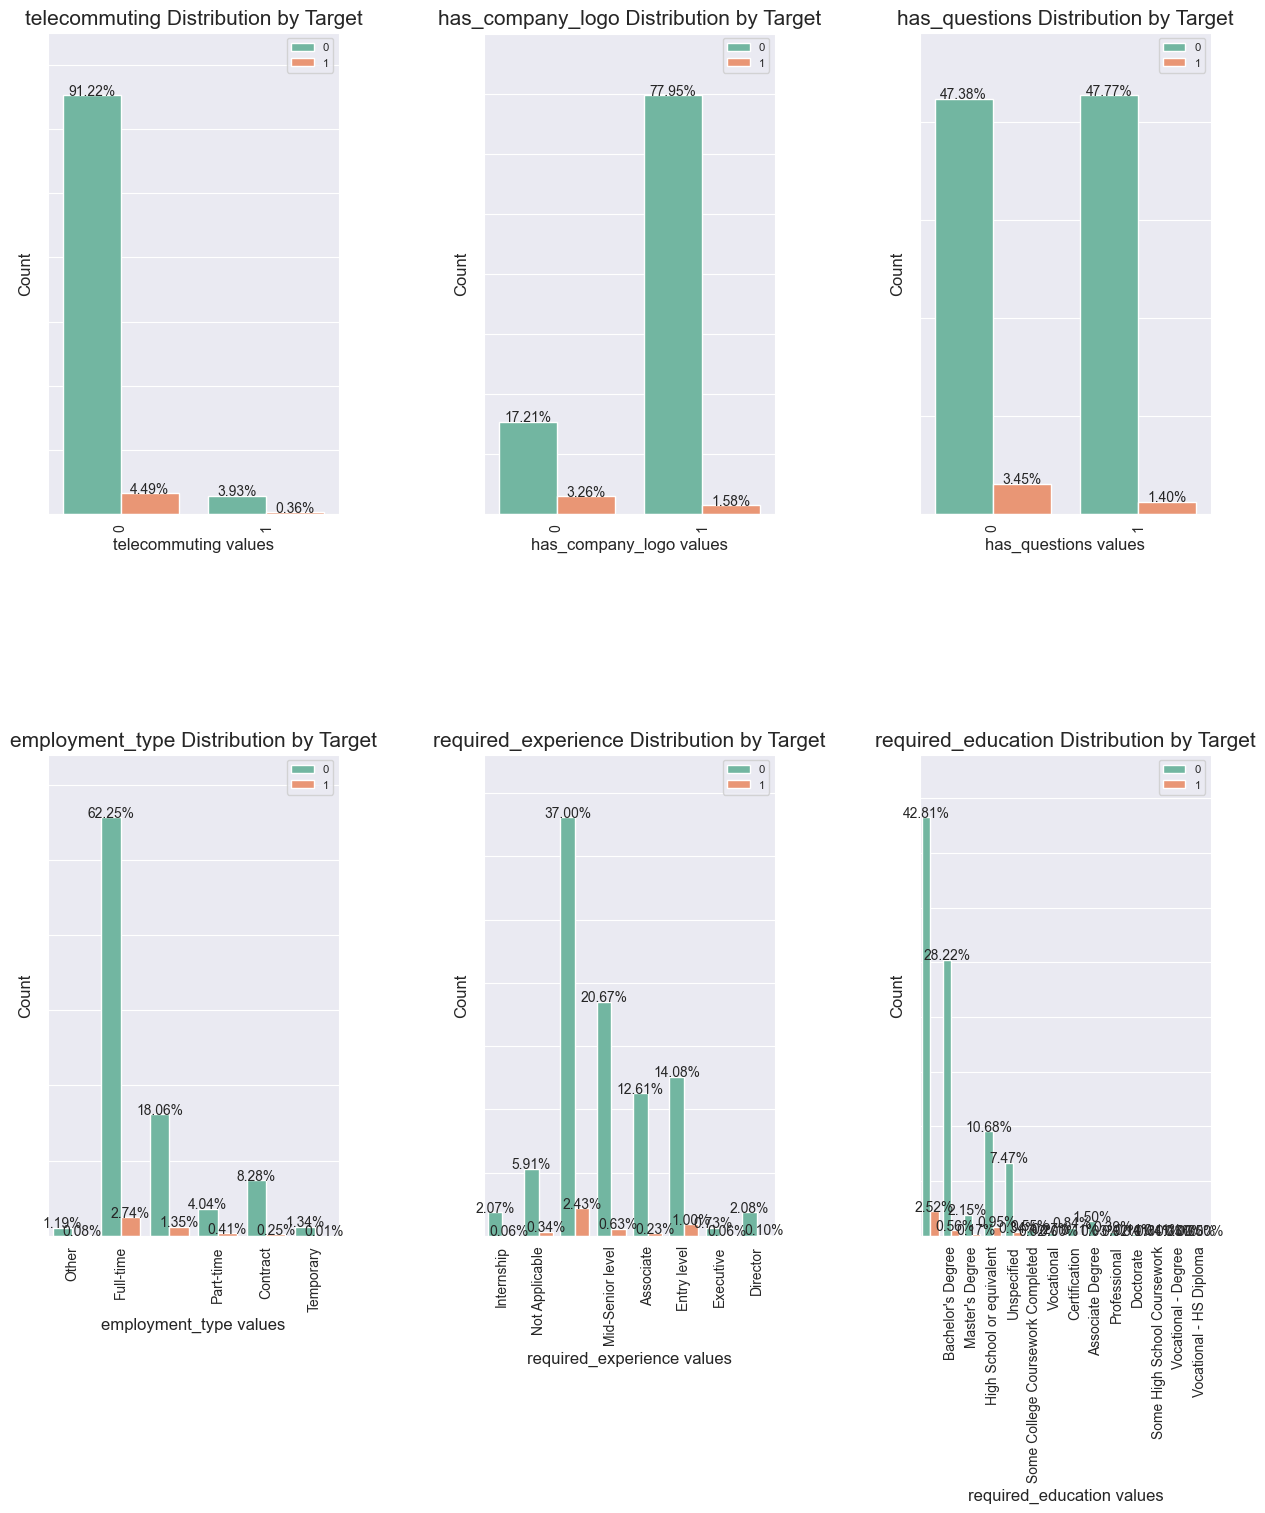

In [34]:
"""Catagorical Feature"""
#Exploratory Data Analysis of tweets
cat_df = df[["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education", "industry", "function","fraudulent"]]
cat_cols = ["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education",]
# visualizating catagorical variable by target
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(3, 3, wspace=0.5, hspace=0.5) # The grid of chart
plt.figure(figsize=(15,25)) # size of figure

# loop to get column and the count of plots
for n, col in enumerate(cat_df[cat_cols]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=cat_df, hue='fraudulent', palette='Set2') 
    ax.set_ylabel('Count', fontsize=12) # y axis label
    ax.set_title(f'{col} Distribution by Target', fontsize=15) # title label
    ax.set_xlabel(f'{col} values', fontsize=12) # x axis label
    xlabels = ax.get_xticklabels() 
    ylabels = ax.get_yticklabels() 
    ax.set_xticklabels(xlabels,  fontsize=10)
    ax.set_yticklabels(ylabels,  fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=90) 
    total = len(cat_df)
    sizes=[] # Get highest values in y
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    ax.set_ylim(0, max(sizes) * 1.15) #set y limit based on highest heights

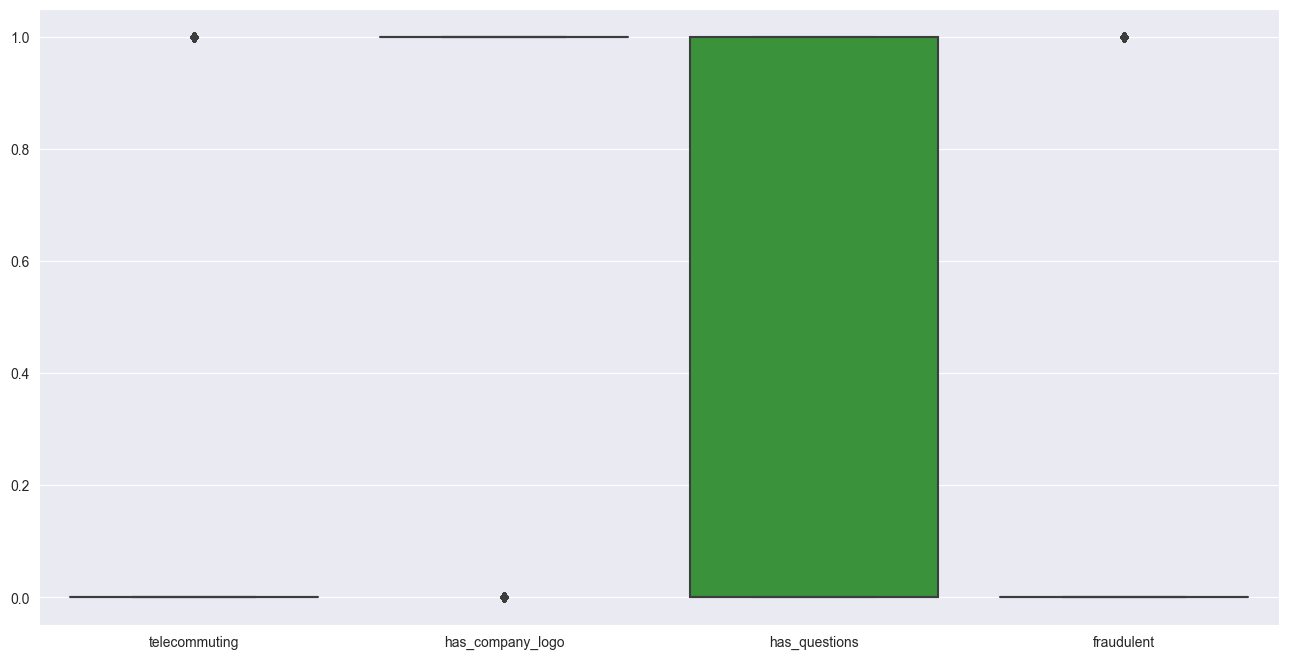

In [35]:
plt.figure(figsize=[16,8])
sb.boxplot(data = df_num)
plt.show()

In [36]:
df_num = df_num[df_num['telecommuting'] < 0.9 ]
df_num = df_num[df_num['fraudulent'] < 0.9 ]
df_num = df_num[df_num['has_company_logo'] > 0.1 ]
df_num

,telecommuting,has_company_logo,has_questions,fraudulent,salary_range
0,0,1,0,0,
1,0,1,0,0,
2,0,1,0,0,
3,0,1,0,0,
4,0,1,1,0,
...,...,...,...,...,...
17872,0,1,0,0,
17873,0,1,0,0,
17875,0,1,1,0,
17876,0,1,1,0,


<AxesSubplot:xlabel='function', ylabel='count'>

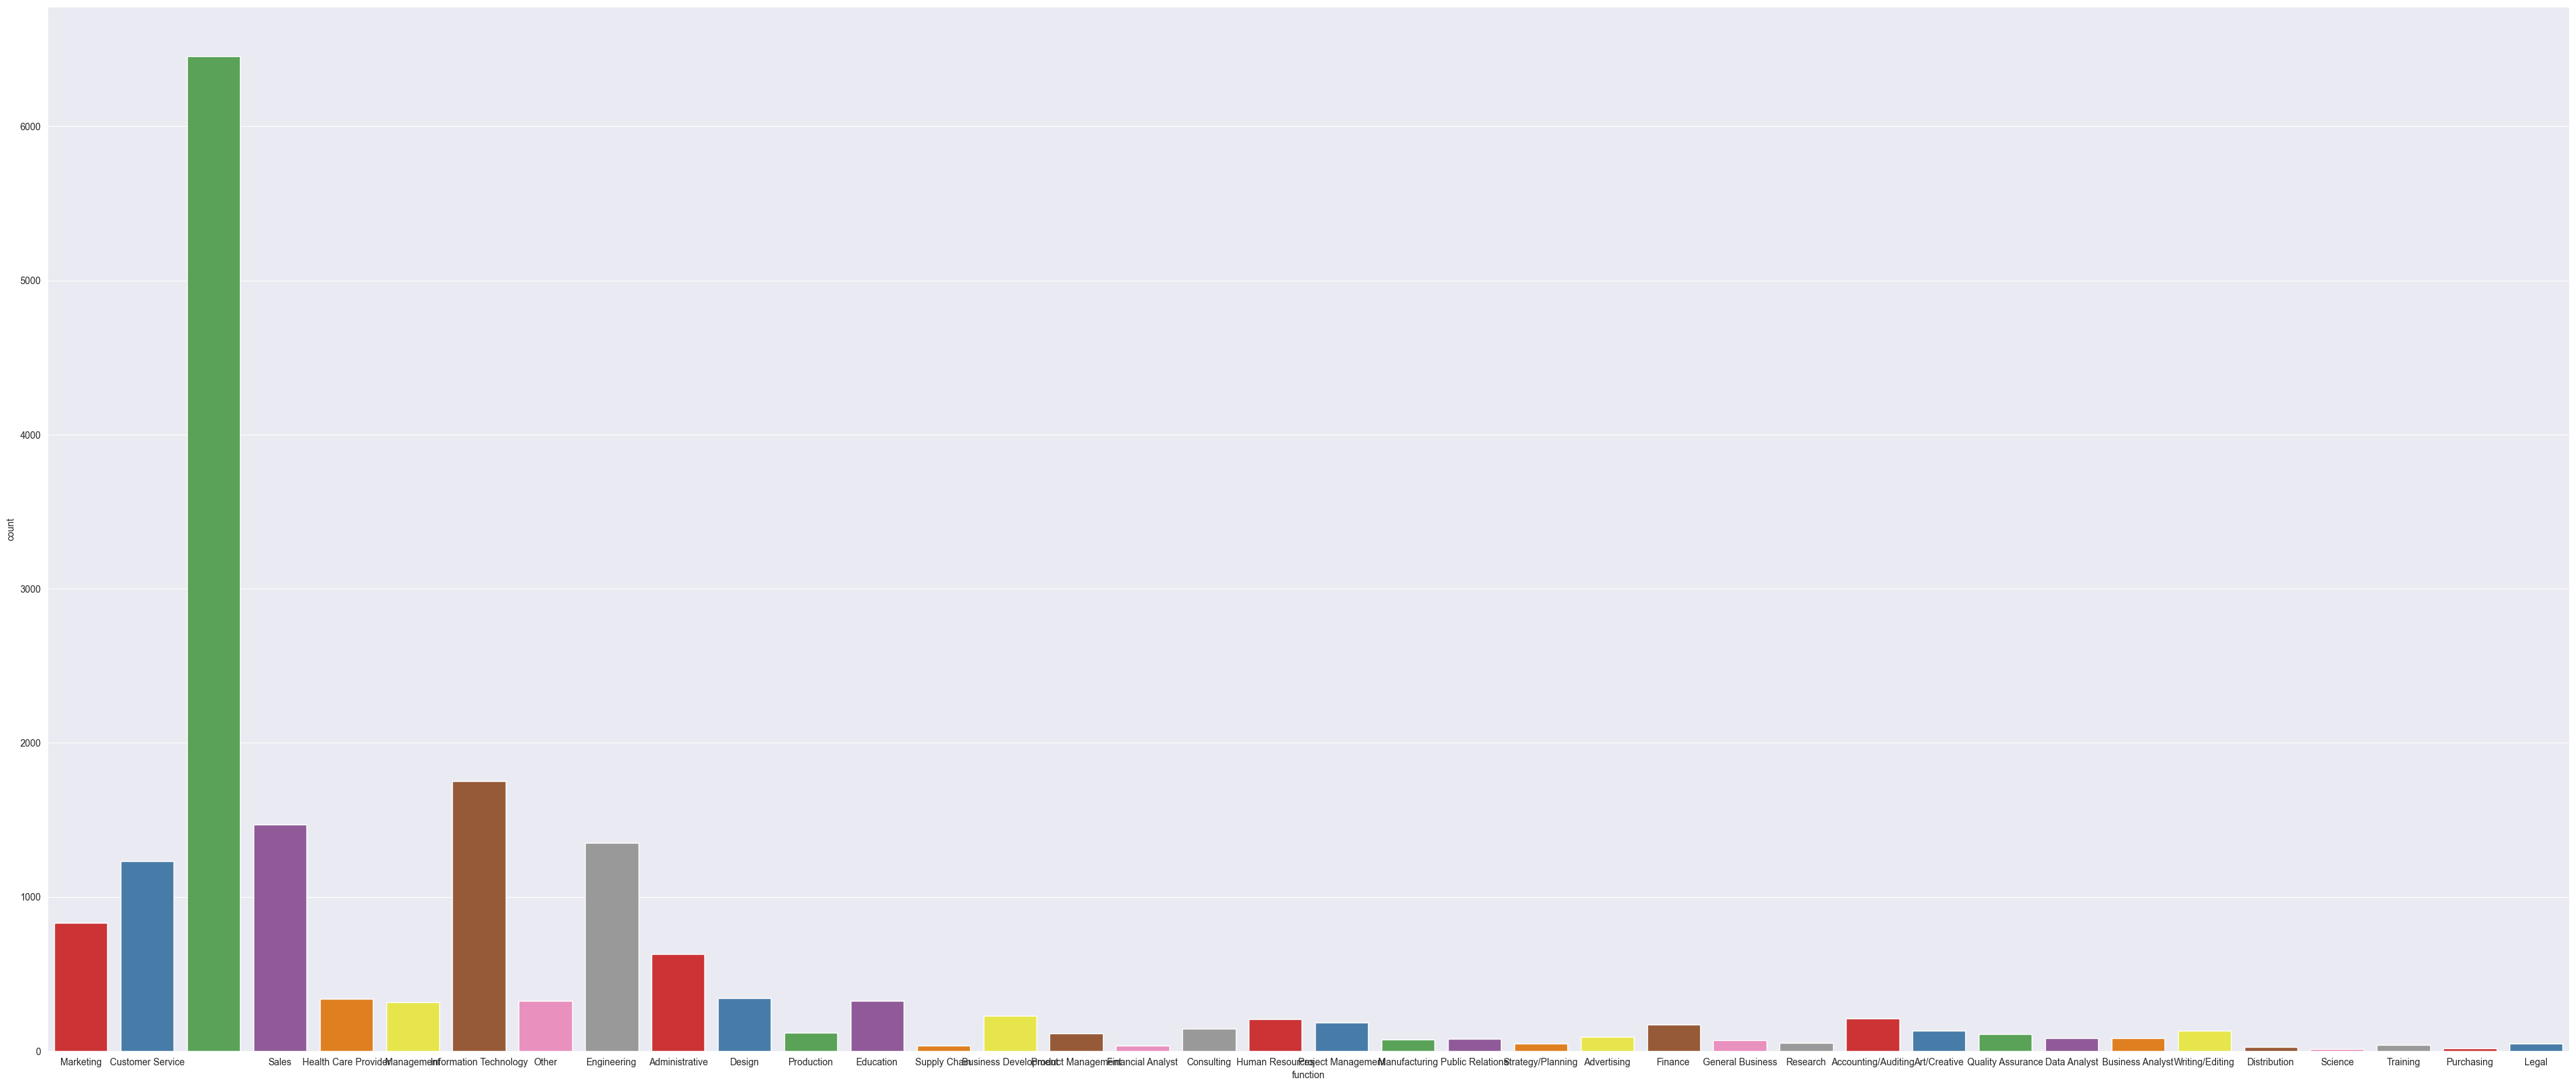

In [37]:
plt.figure(figsize=(48,20))
sb.set_style("darkgrid")
sb.countplot(x='function',data=df,palette='Set1')

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

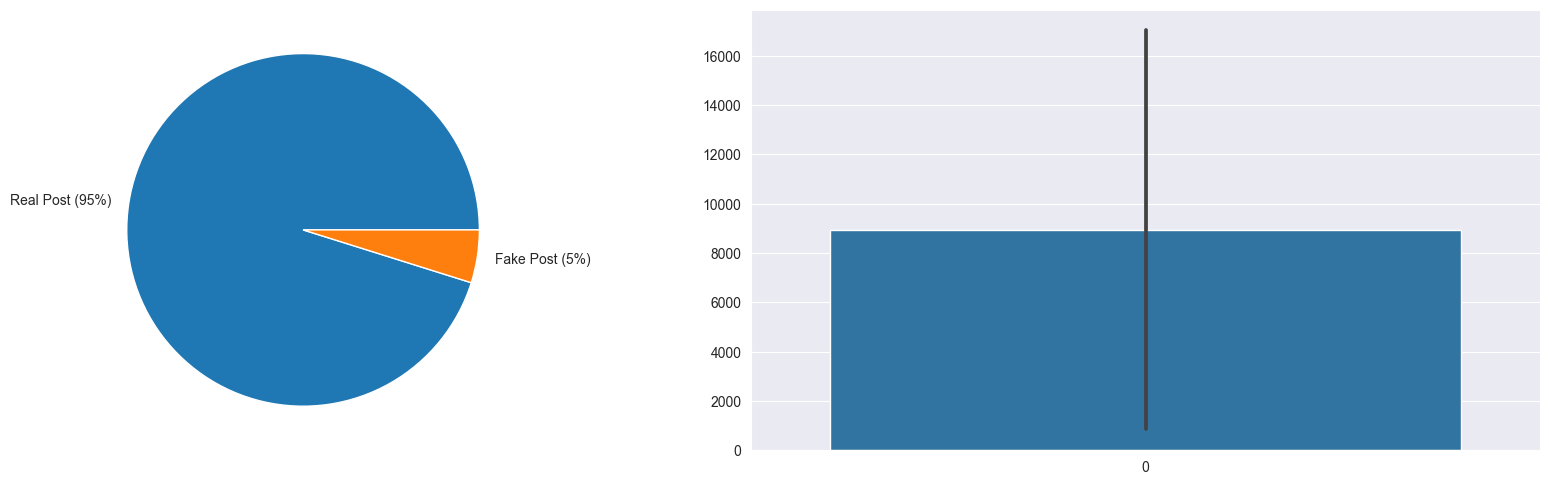

In [38]:
#Target
fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

df["fraudulent"].value_counts().plot(kind='pie', ax=axes[0], labels=['Real Post (95%)', 'Fake Post (5%)'])
temp = df["fraudulent"].value_counts()
sns.barplot(temp, ax=axes[1])

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xticklabels(["Real Post (17014) [0's]", "Fake Post (866) [1's]"])

axes[0].set_title('Target Distribution in Dataset', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()

<AxesSubplot:xlabel='employment_type', ylabel='required_experience'>

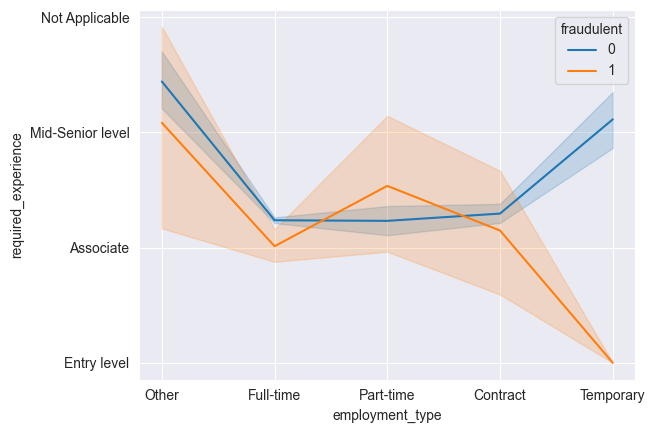

In [ ]:
sns.lineplot(data=df,x='employment_type',y='required_experience',hue='fraudulent')

<AxesSubplot:xlabel='required_experience', ylabel='required_education'>

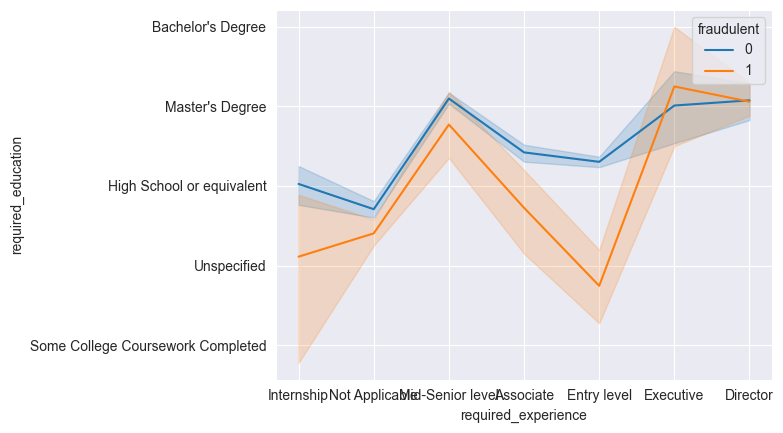

In [ ]:
sns.lineplot(data=df,x='required_experience',y='required_education',hue='fraudulent')

Text(0.5, 0, 'Countries')

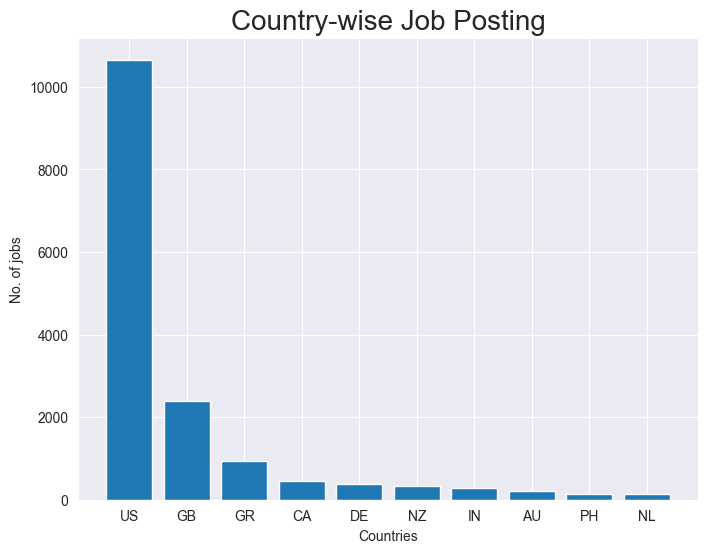

In [39]:
df.groupby('fraudulent').count()['title'].reset_index().sort_values(by='title',ascending=False)
def split(location):
    l =location.split(',')
    return l[0]
df['country'] = df.location.apply(split)
country = dict(df.country.value_counts()[:11])
del country[' ']
plt.figure(figsize=(8,6))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

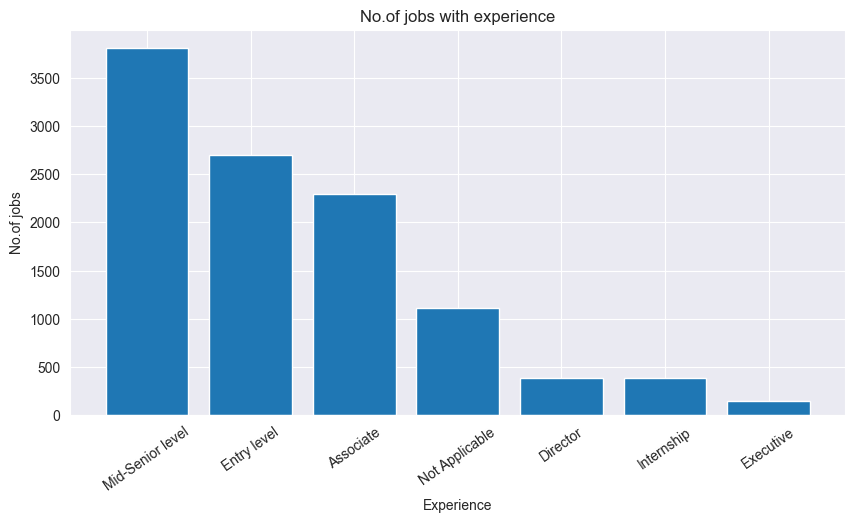

In [40]:
experience =dict(df.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(10,5))
plt.bar(experience.keys(),experience.values())
plt.title('No.of jobs with experience')
plt.xlabel('Experience',size=10)
plt.ylabel('No.of jobs',size=10)
plt.xticks(rotation=35)
plt.show()

In [41]:
#Most frequent jobs
print(df.title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [42]:
#Titles and count of real jobs
print(df[df.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [43]:
#Titles and count of fraudulent jobs
print(df[df.fraudulent==1].title.value_counts()[:10])

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: title, dtype: int64


### CORRELATION MATRIX

<AxesSubplot:>

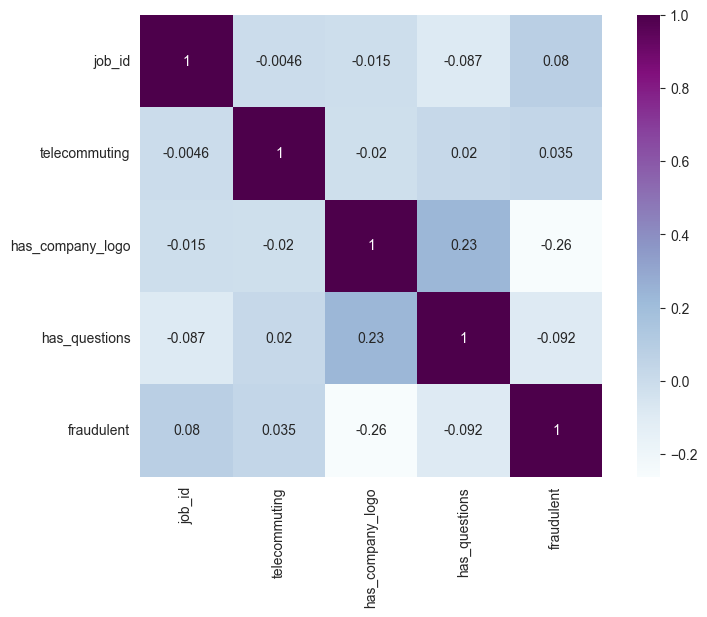

In [44]:
matrix = df.corr() 
plt.figure(figsize=(9,6))
sns.heatmap(matrix, square=True, cmap="BuPu",annot=True)

### DATA CLEANING

In [45]:

#Merging all the text and deleting the columns which are not necessary.

df["text"] = df["title"] + " " + df["location"] + " " + df["department"] + " " + df["company_profile"]+ " " + df["description"] + " " + df["requirements"] + " " + df["benefits"] + " " +df["required_experience"] + " " + df["required_education"] + " " + df["industry"] + " " +df["function"] + " " + df["country"] + " " + df["employment_type"]
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']
del df['country']
del df['employment_type']
df.head()


,job_id,salary_range,telecommuting,has_company_logo,has_questions,fraudulent,text
0,1,,0,1,0,0,"Marketing Intern US, NY, New York Marketing We..."
1,2,,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,3,,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,4,,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,5,,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [46]:
df['text'] = [entry.lower() for entry in df['text']]

In [47]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
print(df['text'])
df['last_text'] = df['text'].apply(lambda x: ' '.join([lmtzr.lemmatize(word,'v') for word in x.split() 
]))
print(df['last_text'])
stop_words = set(stopwords.words('english'))
df['last_text'] = df['last_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in 
(stop_words)]))
print(df['last_text'])

0        marketing intern us, ny, new york marketing we...
1        customer service - cloud video production nz, ...
2        commissioning machinery assistant (cma) us, ia...
3        account executive - washington dc us, dc, wash...
4        bill review manager us, fl, fort worth   spots...
                               ...                        
17875    account director - distribution  ca, on, toron...
17876    payroll accountant us, pa, philadelphia accoun...
17877    project cost control staff engineer - cost con...
17878    graphic designer ng, la, lagos     nemsia stud...
17879    web application developers nz, n, wellington e...
Name: text, Length: 17880, dtype: object
0        market intern us, ny, new york market we're fo...
1        customer service - cloud video production nz, ...
2        commission machinery assistant (cma) us, ia, w...
3        account executive - washington dc us, dc, wash...
4        bill review manager us, fl, fort worth spotsou...
               

In [48]:
stop_word = set(stopwords.words('english'))
print(stop_words)

{'m', 'but', 'there', 'all', 'no', 'which', 'will', "didn't", 'do', 'yours', 'having', 'under', "you'd", "shan't", 'against', 'been', "you're", 'further', 'same', 'because', 'ma', "haven't", 'your', 'herself', "shouldn't", "that'll", 'himself', 'doing', 'my', 'some', 'nor', 'not', 'very', "hadn't", 'hasn', 'again', 'isn', 'll', 'itself', "isn't", 'we', 'other', 'ourselves', 'shouldn', "won't", 'until', 'his', 'was', 'only', 'while', 'don', 'up', 'this', 'those', 'above', 'so', 'yourselves', 'too', 'below', 'where', "mightn't", 'after', 'haven', 'then', 'mightn', 've', 'a', 'out', 'can', 'him', 'they', 'didn', 'of', 'myself', 'each', 'through', 'wasn', 'should', 'with', 'most', 't', 'me', 're', 'as', 'shan', 'were', 'off', 'is', 'weren', 'themselves', 'before', 's', 'here', 'am', 'during', 'if', 'has', 'their', "aren't", "wouldn't", 'wouldn', 'be', 'these', 'once', "don't", 'hers', 'ain', 'own', 'when', "needn't", 'did', 'it', 'aren', 'theirs', 'he', 'couldn', 'into', 'won', 'our', 'she

In [49]:
df['last_text']=df['last_text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))
print(df['last_text'])

0        market intern us, ny, new york market we're fo...
1        customer service - cloud video production nz, ...
2        commission machinery assistant (cma) us, ia, w...
3        account executive - washington dc us, dc, wash...
4        bill review manager us, fl, fort worth spotsou...
                               ...                        
17875    account director - distribution ca, on, toront...
17876    payroll accountant us, pa, philadelphia accoun...
17877    project cost control staff engineer - cost con...
17878    graphic designer ng, la, lagos nemsia studios ...
17879    web application developers nz, n, wellington e...
Name: last_text, Length: 17880, dtype: object


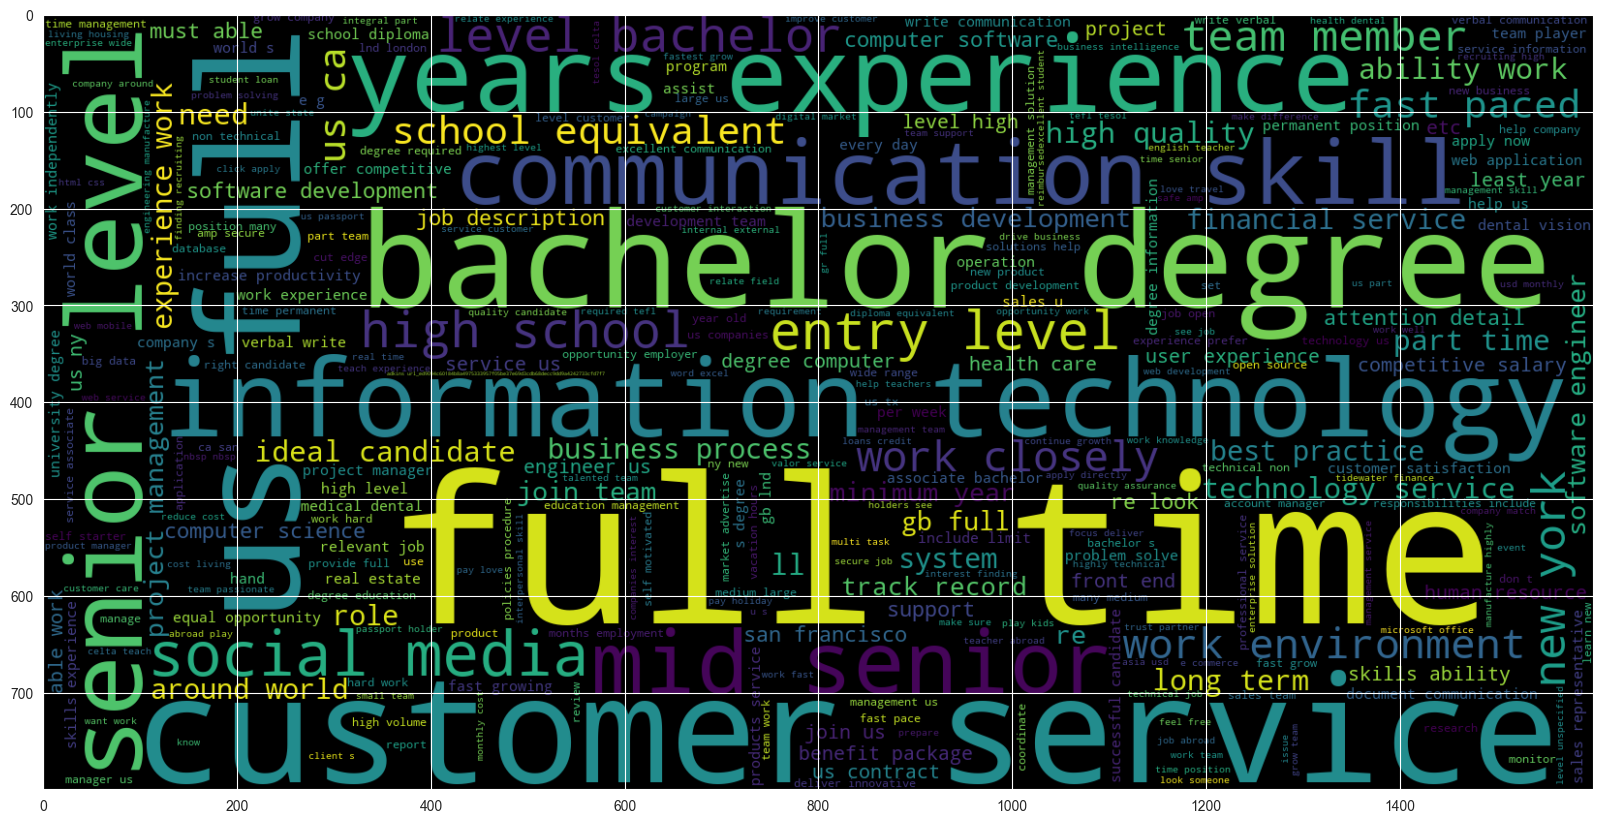

In [50]:

# Text that is not fraudulent
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.fraudulent == 0].last_text))
plt.imshow(wc , interpolation = 'bilinear')


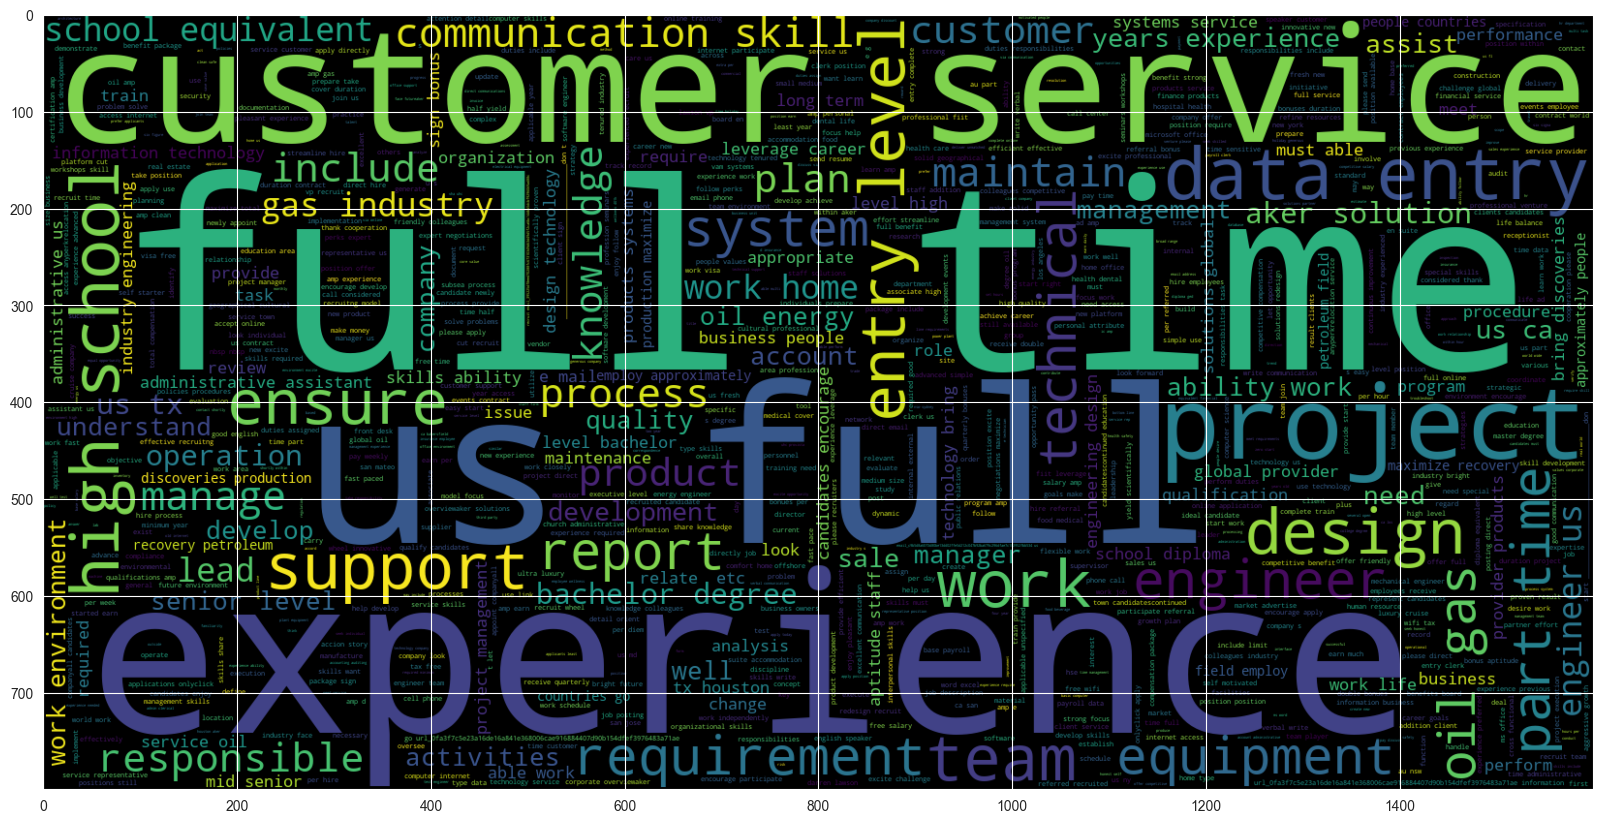

In [51]:

# Text that is fraudulent
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.fraudulent == 1].last_text))
plt.imshow(wc , interpolation = 'bilinear')



### SPLITING OF DATASET (TRAINING AND TESTING)

In [52]:
y = df["fraudulent"]
X_train, X_test, y_train, y_test = train_test_split(df["last_text"], y,random_state=0,test_size=.30)
count_vectorizer = CountVectorizer(stop_words="english", min_df=0.05,max_df=0.9)
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
tfidf_vectorizer = TfidfVectorizer(stop_words="english", min_df=0.05, max_df=0.9)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
print(count_train.shape)
print(count_test.shape)
print(tfidf_train.shape)
print(tfidf_test.shape)
print(X_train)

(12516, 743)
(5364, 743)
(12516, 743)
(5364, 743)
9770     client engagement manager au, vic, melbourne s...
15336    english teacher abroad us, oh, bowl green help...
16715    customer service representative us, il, chicag...
6107     office manager, secretary gr, g, patras operat...
16679    urgent need :oracle developer bahrain. bh, , i...
                               ...                        
9225     senior tax professional product manager us, ca...
13123    qa engineer us, ca, san mateo tile one success...
9845     senior qa engineer in, , hyderabad information...
10799    customer service associate us, ct, hartford no...
2732     peoplesoft hcm lead - programmer/analyst us, p...
Name: last_text, Length: 12516, dtype: object


In [53]:
tfidf_train

<12516x743 sparse matrix of type '<class 'numpy.float64'>'
	with 1191883 stored elements in Compressed Sparse Row format>

## BUILDING MODELS

### 1.NAIVE BAYES CLASSIFIER

In [54]:
# Creating a MulitnomialNB model
mnb = MultinomialNB()
mnb.fit(tfidf_train, y_train)

MultinomialNB()

In [56]:
# Prediction on TF-IDF test data to get predictions
mnb_pred = mnb.predict(tfidf_test)
# Accuracy of predictions
mnb_score = metrics.accuracy_score(y_test, mnb_pred)


In [57]:
# Creating a MulitnomialNB model
count_mnb = MultinomialNB()
# Training
count_mnb.fit(count_train, y_train)

MultinomialNB()

In [58]:
# Prediction on count test data to get predictions
count_mnb_pred = count_mnb.predict(count_test)
# Calculating the accuracy
count_mnb_score = metrics.accuracy_score(y_test, count_mnb_pred)
tf_mnb = confusion_matrix(y_test, mnb_pred)
c_mnb = confusion_matrix(y_test, count_mnb_pred)
print('NaiveBayes Tfidf Score: ', mnb_score)
print('NaiveBayes Count Score: ', count_mnb_score)

NaiveBayes Tfidf Score:  0.9610365398956003
NaiveBayes Count Score:  0.8655853840417599


<AxesSubplot:title={'center':'MulitnomialNB TF Confusion Matrix'}>

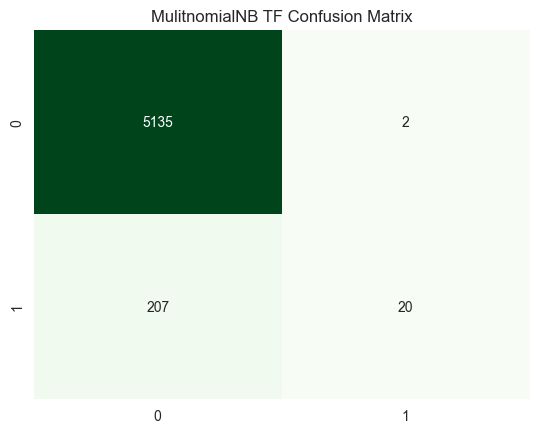

In [59]:
# Calculating the confusion matrices for the tfidf_nb model

plt.title("MulitnomialNB TF Confusion Matrix")
sns.heatmap(tf_mnb,cbar=False,annot=True,cmap="Greens",fmt="d")


<AxesSubplot:title={'center':'MulitnomialNB Count Confusion Matrix'}>

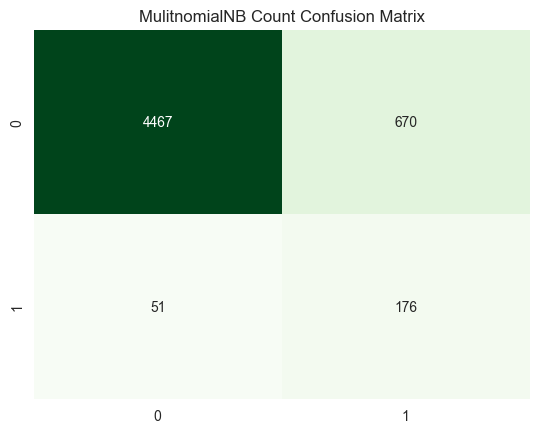

In [60]:
# Calculating the confusion matrices for the count_nb model
plt.title("MulitnomialNB Count Confusion Matrix")
sns.heatmap(c_mnb,cbar=False,annot=True,cmap="Greens",fmt="d")

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mnb_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5137
           1       0.91      0.09      0.16       227

    accuracy                           0.96      5364
   macro avg       0.94      0.54      0.57      5364
weighted avg       0.96      0.96      0.95      5364



In [64]:
print(classification_report(y_test, count_mnb_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      5137
           1       0.21      0.78      0.33       227

    accuracy                           0.87      5364
   macro avg       0.60      0.82      0.63      5364
weighted avg       0.96      0.87      0.90      5364



In [65]:
from sklearn.naive_bayes import ComplementNB
# Creating a ComplementNB model
cnb=ComplementNB()
cnb.fit(tfidf_train, y_train)

ComplementNB()

In [66]:
# Prediction on tfidf test data
cnb_pred = cnb.predict(tfidf_test)
df_cnb = pd.DataFrame({'Y_test': y_test , 'Y_pred': cnb_pred}) 
df_cnb

,Y_test,Y_pred
9256,0,0
3860,0,0
6190,0,1
13658,0,0
11231,0,0
...,...,...
3140,0,0
12815,1,1
12791,0,0
13335,0,0


In [67]:
# Calculating accuracy using the metrics module
cnb_score = metrics.accuracy_score(y_test, cnb_pred)
print(cnb_score)

0.779082774049217


In [68]:
print(classification_report(y_test, cnb_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87      5137
           1       0.15      0.87      0.25       227

    accuracy                           0.78      5364
   macro avg       0.57      0.82      0.56      5364
weighted avg       0.96      0.78      0.84      5364



In [69]:
from sklearn.naive_bayes import BernoulliNB
# Creating a BernoulliNB model
bnb=BernoulliNB()
bnb.fit(tfidf_train, y_train)

BernoulliNB()

In [70]:
bnb_pred = bnb.predict(tfidf_test)
df_bnb = pd.DataFrame({'Y_test': y_test , 'Y_pred': bnb_pred}) 
df_bnb
# Calculating accuracy using the metrics module
bnb_score = metrics.accuracy_score(y_test, bnb_pred)
print(bnb_score)

0.8391126025354213


In [71]:
print(classification_report(y_test, bnb_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      5137
           1       0.19      0.83      0.30       227

    accuracy                           0.84      5364
   macro avg       0.59      0.84      0.61      5364
weighted avg       0.96      0.84      0.88      5364



<AxesSubplot:title={'center':'BernoulliNB Count Confusion Matrix'}>

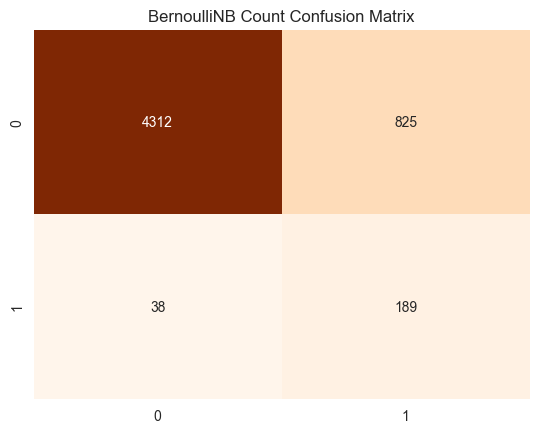

In [72]:
bnb_cm=confusion_matrix(y_test, bnb_pred)
# Calculating the confusion matrices for the count_nb model
plt.title("BernoulliNB Count Confusion Matrix")
sns.heatmap(bnb_cm,cbar=False,annot=True,cmap="Oranges",fmt="d")

### 2.LINEAR SUPPORT VECTOR CLASSIFIER

In [73]:
# Create a LinearSVC model
lsvc = LinearSVC()
# Training
lsvc.fit(tfidf_train, y_train)

LinearSVC()

In [74]:
# Prediction on tfidf test data
lsvc_pred = lsvc.predict(tfidf_test)
# Calculating accuracy using the metrics module
lsvc_score = metrics.accuracy_score(y_test, lsvc_pred)
print("LinearSVC Score: %0.3f" % lsvc_score)

LinearSVC Score: 0.978


In [75]:
lsvc_cm=confusion_matrix(y_test, lsvc_pred)

<AxesSubplot:title={'center':'LinearSVC Count Confusion Matrix'}>

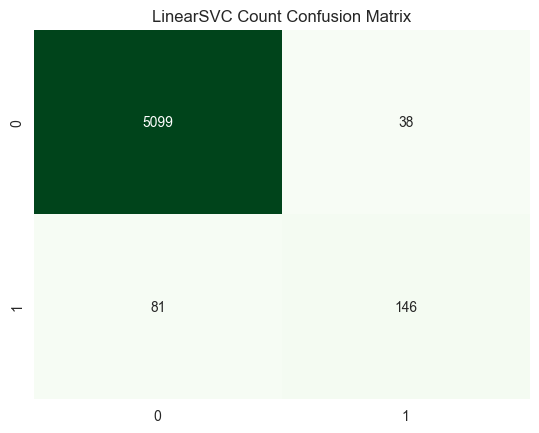

In [76]:
# Calculating the confusion matrices for the count_nb model
plt.title("LinearSVC Count Confusion Matrix")
sns.heatmap(lsvc_cm,cbar=False,annot=True,cmap="Greens",fmt="d")

<AxesSubplot:>

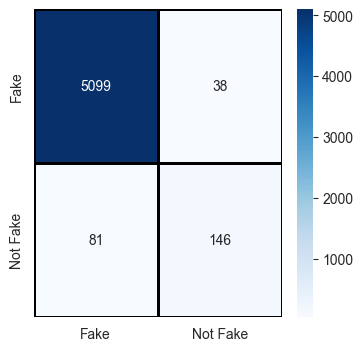

In [77]:
plt.figure(figsize = (4,4))
sns.heatmap(lsvc_cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' ,xticklabels = ['Fake','Not Fake'] , yticklabels = ['Fake','Not Fake'])

In [78]:
print(classification_report(y_test, lsvc_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5137
           1       0.79      0.64      0.71       227

    accuracy                           0.98      5364
   macro avg       0.89      0.82      0.85      5364
weighted avg       0.98      0.98      0.98      5364



#### 3.RANDOM FOREST 

In [79]:
# Create a Random Forest Classifier model
rf = RandomForestClassifier(bootstrap=True)
rf.fit(tfidf_train, y_train)
pickle.dump(rf, open("fake_job_listing_rf.pkl", "wb")) 

In [80]:
# Prediction on tfidf test data
rf_pred = rf.predict(tfidf_test)
# Calculating accuracy using the metrics module
rf_score = metrics.accuracy_score(y_test, rf_pred)
print('RandomForest Classifier Score: ', rf_score)

RandomForest Classifier Score:  0.9789336316181954


In [81]:
print(classification_report(y_test, rf_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5137
           1       1.00      0.50      0.67       227

    accuracy                           0.98      5364
   macro avg       0.99      0.75      0.83      5364
weighted avg       0.98      0.98      0.98      5364



<AxesSubplot:title={'center':'RandomForest Classifier Confusion Matrix'}>

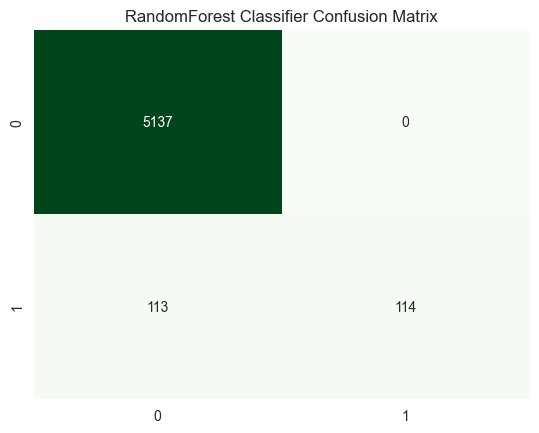

In [82]:
rf_cm = confusion_matrix(y_test, rf_pred)
# Calculating the confusion matrices for the tfidf_svc model
plt.title("RandomForest Classifier Confusion Matrix")
sns.heatmap(rf_cm,cbar=False,annot=True,cmap="Greens",fmt="d")

#### 4.LOGISTIC REGRESSION

In [83]:
#logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tfidf_train, y_train)

LogisticRegression()

In [84]:
# Prediction on tfidf test data
lr_pred = lr.predict(tfidf_test)
# Calculating accuracy using the metrics module
lr_score = metrics.accuracy_score(y_test, lr_pred)

In [85]:
print('Logistic Regression Score: ', lr_score)

Logistic Regression Score:  0.9705443698732289


In [86]:
print(classification_report(y_test, lr_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5137
           1       0.88      0.35      0.50       227

    accuracy                           0.97      5364
   macro avg       0.93      0.68      0.74      5364
weighted avg       0.97      0.97      0.96      5364



<AxesSubplot:title={'center':'Logistic Regression Confusion Matrix'}>

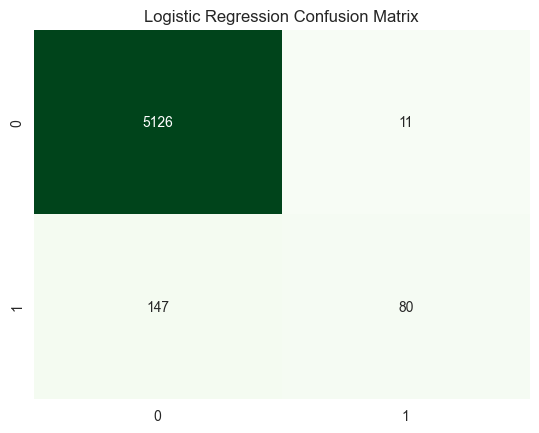

In [87]:
lr_cm = confusion_matrix(y_test, lr_pred)
# Calculating the confusion matrices for the tfidf_svc model
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(lr_cm,cbar=False,annot=True,cmap="Greens",fmt="d")

#### 5.K-NEAREST NEIGHBORS 

In [88]:
#K-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(tfidf_train, y_train)

KNeighborsClassifier()

In [90]:
# Prediction on tfidf test data
knn_pred = knn.predict(tfidf_test)
# Calculating accuracy using the metrics module
knn_score = metrics.accuracy_score(y_test, knn_pred)
print('KNeighbors Classifier Score: ', knn_score)

KNeighbors Classifier Score:  0.9817300521998509


In [92]:
print(classification_report(y_test, knn_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5137
           1       0.83      0.71      0.77       227

    accuracy                           0.98      5364
   macro avg       0.91      0.85      0.88      5364
weighted avg       0.98      0.98      0.98      5364



<AxesSubplot:title={'center':'KNeighbors Classifier Confusion Matrix'}>

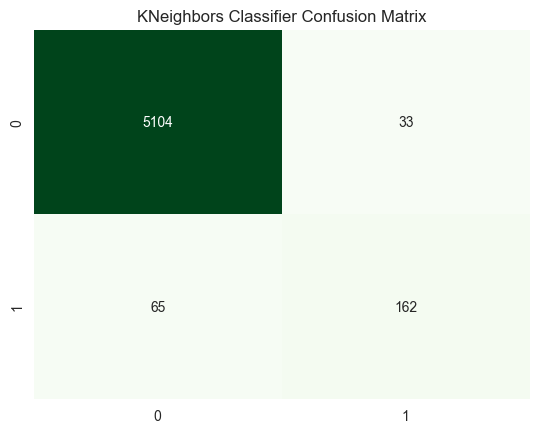

In [93]:
knn_cm = confusion_matrix(y_test, knn_pred)
# Calculating the confusion matrices for the tfidf_svc model
plt.title("KNeighbors Classifier Confusion Matrix")
sns.heatmap(knn_cm,cbar=False,annot=True,cmap="Greens",fmt="d")

#### 6.DECISION TREE MODEL

In [94]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()
# Train Decision Tree Classifer
dtc.fit(tfidf_train, y_train)

DecisionTreeClassifier()

In [96]:
#Predict the response for test dataset
dtc_pred = dtc.predict(tfidf_test)
# Model Accuracy, how often is the classifier correct?
metrics.accuracy_score(y_test, dtc_pred)

0.9636465324384788

In [97]:
print(classification_report(y_test, dtc_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5137
           1       0.57      0.59      0.58       227

    accuracy                           0.96      5364
   macro avg       0.77      0.79      0.78      5364
weighted avg       0.96      0.96      0.96      5364



<AxesSubplot:title={'center':'DecisionTree Classifier Confusion Matrix'}>

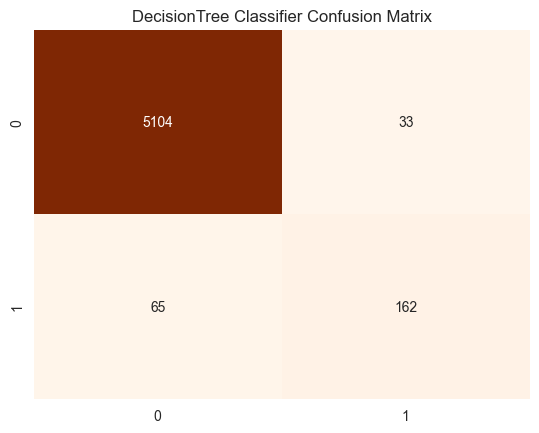

In [98]:
dtc_cm = confusion_matrix(y_test, knn_pred)
# Calculating the confusion matrices for the tfidf_svc model
plt.title("DecisionTree Classifier Confusion Matrix")
sns.heatmap(dtc_cm,cbar=False,annot=True,cmap="Oranges",fmt="d")

In [99]:
df.columns


Index(['job_id', 'salary_range', 'telecommuting', 'has_company_logo',
       'has_questions', 'fraudulent', 'text', 'last_text'],
      dtype='object')

In [100]:
feature=df.columns
feature

Index(['job_id', 'salary_range', 'telecommuting', 'has_company_logo',
       'has_questions', 'fraudulent', 'text', 'last_text'],
      dtype='object')

In [101]:
'''
#! pip install tree --user
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(100,100))
_=tree.plot_tree(dtc,filled=True,fontsize=12,rounded=True,feature_names=feature,class_names={1:'fake',0:'real'})
'''


"\n#! pip install tree --user\nfrom sklearn import tree\nimport matplotlib.pyplot as plt\nfrom sklearn.tree import plot_tree\nplt.figure(figsize=(100,100))\n_=tree.plot_tree(dtc,filled=True,fontsize=12,rounded=True,feature_names=feature,class_names={1:'fake',0:'real'})\n"

In [102]:
#Complete Data Visualization
atext = ''
for news in df.text.values:
    atext += f" {news}"
wordcloud = WordCloud(width = 3000,height = 2000,background_color = 'black',stopwords =
set(nltk.corpus.stopwords.words("english"))).generate(str(atext))
fig = plt.figure(figsize = (40, 30),facecolor = 'k',edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
